<a href="https://colab.research.google.com/github/crackledsp/PowerConsumptionEDA/blob/main/EDA_power_consumption.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [63]:
%matplotlib inline
# !pip install sweetviz
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics import tsaplots
import statsmodels.api as sm
import seaborn as sns
import numpy as np
import datetime
import sweetviz as sv

1. EDA on given data - 
I have shared the data of smart meter readings in home.
It consists of energy consumed by different devices and weather readings.
Data contains the readings with a time span of 1 minute of house appliances in kW.

---


Explore the data(HomeC.csv.zip) and make following analysis - 

---


  a. Which devices consume most power during summer and winter seasons

---


  b. Explore the hourly trend in living room power consumption

---



 c. What are peak working hours in home office





In [64]:
house_data=pd.read_csv("./HomeC.csv",sep=",")

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (27) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [65]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136866 entries, 0 to 136865
Data columns (total 32 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   time                 136866 non-null  int64  
 1   use [kW]             136866 non-null  float64
 2   gen [kW]             136866 non-null  float64
 3   House overall [kW]   136866 non-null  float64
 4   Dishwasher [kW]      136866 non-null  float64
 5   Furnace 1 [kW]       136866 non-null  float64
 6   Furnace 2 [kW]       136866 non-null  float64
 7   Home office [kW]     136866 non-null  float64
 8   Fridge [kW]          136866 non-null  float64
 9   Wine cellar [kW]     136866 non-null  float64
 10  Garage door [kW]     136866 non-null  float64
 11  Kitchen 12 [kW]      136866 non-null  float64
 12  Kitchen 14 [kW]      136866 non-null  float64
 13  Kitchen 38 [kW]      136865 non-null  float64
 14  Barn [kW]            136865 non-null  float64
 15  Well [kW]        

In [66]:
# pd.to_datetime(pd.to_numeric(house_data["time"][0]))
house_data[house_data.isnull().any(axis=1)]


,time,use [kW],gen [kW],House overall [kW],Dishwasher [kW],Furnace 1 [kW],Furnace 2 [kW],Home office [kW],Fridge [kW],Wine cellar [kW],Garage door [kW],Kitchen 12 [kW],Kitchen 14 [kW],Kitchen 38 [kW],Barn [kW],Well [kW],Microwave [kW],Living room [kW],Solar [kW],temperature,icon,humidity,visibility,summary,apparentTemperature,pressure,windSpeed,cloudCover,windBearing,precipIntensity,dewPoint,precipProbability
136865,1451761265,1.480683,0.003383,1.480683,0.000133,0.533183,0.488983,0.041333,0.124633,0.007017,0.0126,0.00035,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [67]:
house_data = house_data[0:-1]

In [68]:
house_data.columns = [col.replace(' [kW]', '') for col in house_data.columns]

In [69]:
time_index = pd.date_range('2018-05-01 01:00', periods=len(house_data),  freq='min')  
time_index = pd.DatetimeIndex(time_index)
house_data = house_data.set_index(time_index)
house_data = house_data.drop(['time'], axis=1)

In [70]:

house_data.shape

(136865, 31)

In [71]:
house_data["cloudCover"].unique()
house_data.drop(house_data[house_data['cloudCover'] == 'cloudCover'].index, inplace = True) 
house_data["cloudCover"]=house_data["cloudCover"].astype(float)

In [72]:
(house_data['use']-house_data['House overall']).mean()

0.0

In [73]:
(house_data['gen']-house_data['Solar']).mean()

0.0

In [74]:
house_data['use_HO'] = house_data['use']
house_data['gen_Sol'] = house_data['gen']
house_data.drop(['use','House overall','gen','Solar'], axis=1, inplace=True)
house_data.head(3)

,Dishwasher,Furnace 1,Furnace 2,Home office,Fridge,Wine cellar,Garage door,Kitchen 12,Kitchen 14,Kitchen 38,Barn,Well,Microwave,Living room,temperature,icon,humidity,visibility,summary,apparentTemperature,pressure,windSpeed,cloudCover,windBearing,precipIntensity,dewPoint,precipProbability,use_HO,gen_Sol
2018-05-01 01:58:00,0.000033,0.021083,0.309983,0.043067,0.005167,0.123317,0.013183,0.000667,0.000050,0.000017,0.031750,0.001000,0.004233,0.001633,35.87,partly-cloudy-night,0.61,10.0,Mostly Cloudy,29.4,1016.25,8.29,0.75,285.0,0.0,23.9,0.0,0.714200,0.003417
2018-05-01 01:59:00,0.000017,0.096983,0.062867,0.043283,0.005000,0.123283,0.012883,0.000750,0.000067,0.000017,0.031783,0.001017,0.004233,0.001700,35.87,partly-cloudy-night,0.61,10.0,Mostly Cloudy,29.4,1016.25,8.29,0.75,285.0,0.0,23.9,0.0,0.497067,0.003417
2018-05-01 02:00:00,0.000017,0.064500,0.062633,0.043250,0.005017,0.123350,0.012950,0.000717,0.000083,0.000017,0.031800,0.001000,0.004233,0.001633,35.87,partly-cloudy-night,0.61,10.0,Mostly Cloudy,29.4,1016.25,8.29,0.75,285.0,0.0,23.9,0.0,0.465133,0.003450


In [75]:
energy_df = house_data.filter(items=[ 'gen_Sol', 'use_HO', 'Dishwasher',
                                     'Furnace 1', 'Furnace 2', 'Home office', 'Fridge',
                                     'Wine cellar', 'Garage door', 'Kitchen 12',
                                     'Kitchen 14', 'Kitchen 38', 'Barn', 'Well',
                                     'Microwave', 'Living room','summary'])

Weather_df = house_data.filter(items=['temperature',
                                      'humidity', 'visibility', 'apparentTemperature', 'pressure',
                                      'windSpeed', 'windBearing', 'dewPoint'])

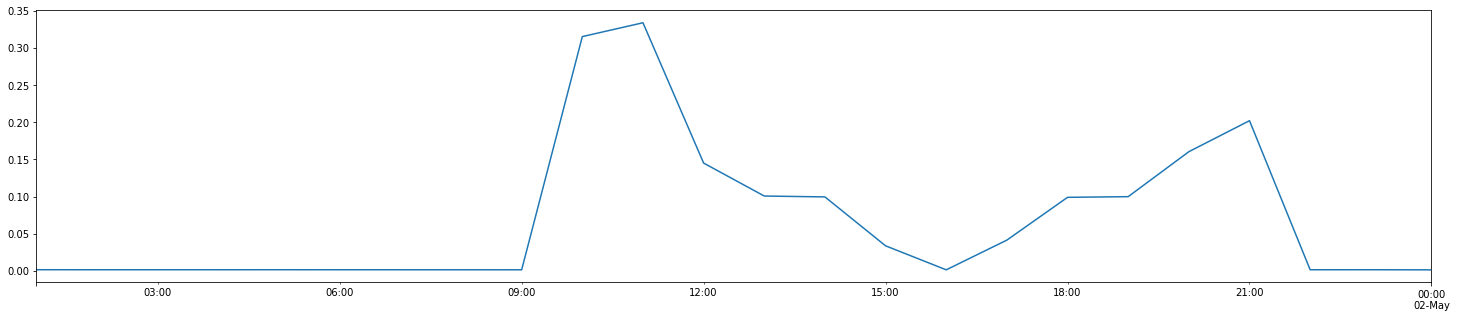

In [76]:
energy_df['Living room'].resample(rule='H').mean().iloc[0:24].plot(figsize=(25,5))

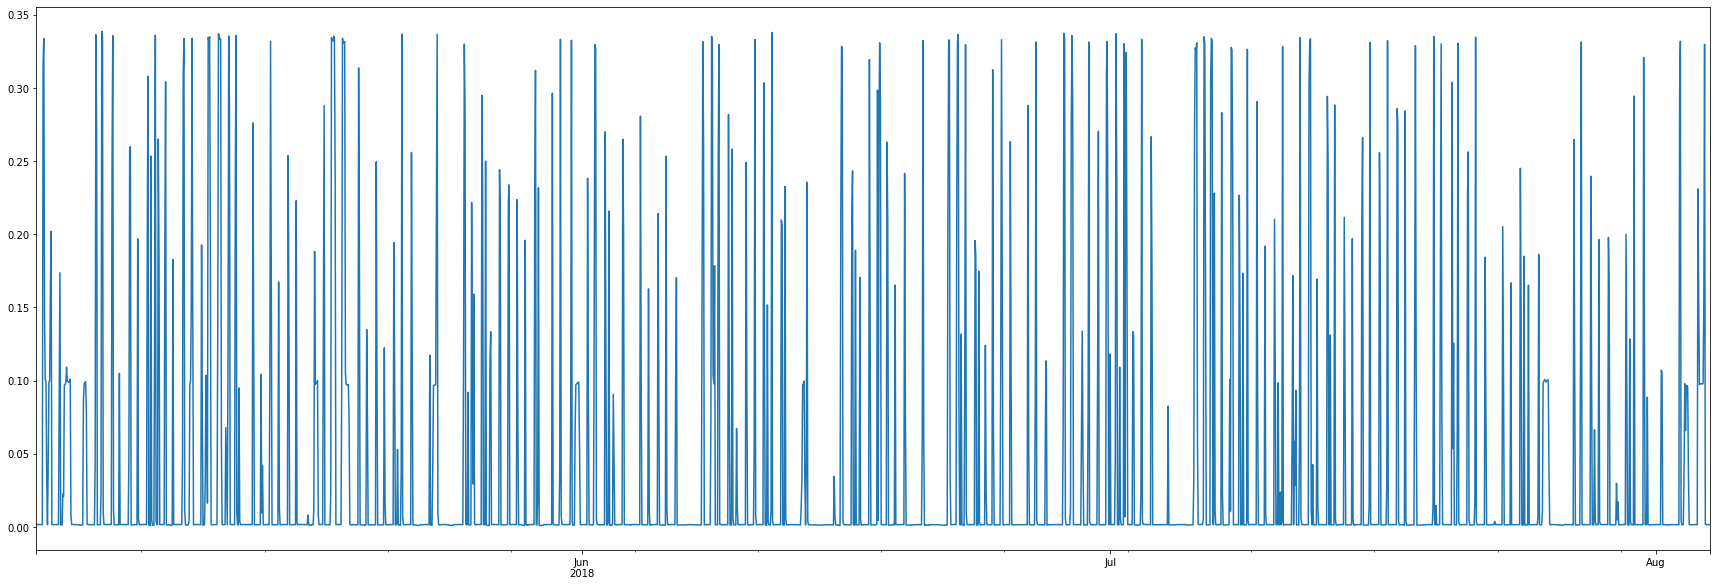

In [77]:
energy_df['Living room'].resample(rule='H').mean().plot(figsize=(30,10))

[Text(0, 0.5, 'Home Office  Usage (kW) '), Text(0.5, 0, 'Daily Hours')]

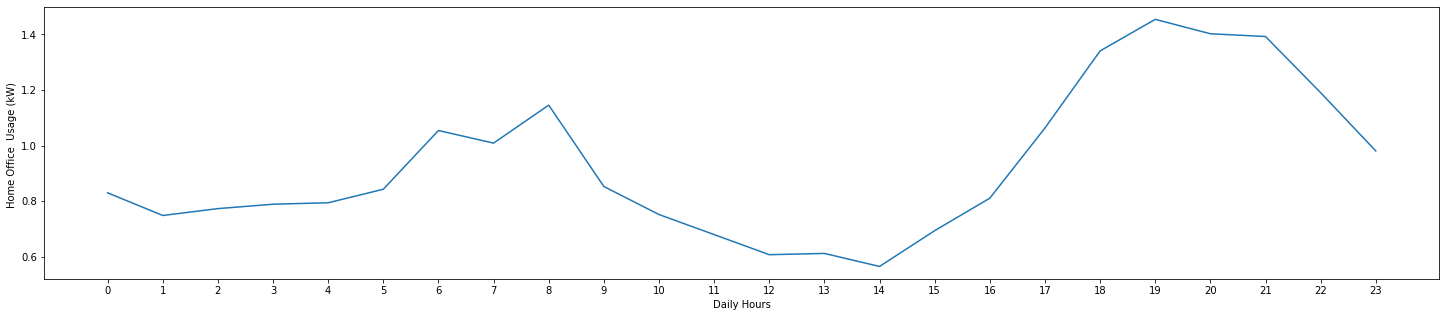

In [78]:
energy_df.groupby(energy_df.index.hour).mean()['use_HO'].plot(figsize=(25,5),xticks=np.arange(24)).set(xlabel='Daily Hours', ylabel='Home Office  Usage (kW) ')


In [79]:
devices_energy_df = energy_df.filter(items=[ 'Dishwasher',
                                     'Furnace 1', 'Furnace 2',  'Fridge',
                                     'Garage door', 
                                     'Well',
                                     'Microwave','summary'])
devices_energy_df.head

<bound method NDFrame.head of                      Dishwasher  Furnace 1  ...  Microwave        summary
2018-05-01 01:58:00    0.000033   0.021083  ...   0.004233  Mostly Cloudy
2018-05-01 01:59:00    0.000017   0.096983  ...   0.004233  Mostly Cloudy
2018-05-01 02:00:00    0.000017   0.064500  ...   0.004233  Mostly Cloudy
2018-05-01 02:01:00    0.000017   0.111333  ...   0.004233  Mostly Cloudy
2018-05-01 02:02:00    0.000017   0.114583  ...   0.004233  Mostly Cloudy
...                         ...        ...  ...        ...            ...
2018-08-04 02:00:00    0.000083   0.538250  ...   0.004100  Partly Cloudy
2018-08-04 02:01:00    0.000183   0.534100  ...   0.004050  Partly Cloudy
2018-08-04 02:02:00    0.000200   0.533483  ...   0.004083  Partly Cloudy
2018-08-04 02:03:00    0.000183   0.532800  ...   0.004083  Partly Cloudy
2018-08-04 02:04:00    0.000200   0.532550  ...   0.004100  Partly Cloudy

[136807 rows x 8 columns]>

In [80]:
devices_energy_df["summary"].loc[energy_df["summary"].isin(["Clear","Partly Cloudy","Breezy","Breezy and Partly Cloudy"])]="summer"
devices_energy_df["summary"].loc[energy_df["summary"].isin(["Mostly Cloudy","Overcast","Flurries and Breezy","Breezy and Mostly Cloudy","Light Snow","Flurries","Snow","Foggy"])]="winter"


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [81]:
devices_energy_df_winter=devices_energy_df[devices_energy_df['summary']=='winter']
devices_energy_df_winter.drop('summary', axis=1, inplace=True)
devices_energy_df_winter.head()

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Dishwasher,Furnace 1,Furnace 2,Fridge,Garage door,Well,Microwave
2018-05-01 01:58:00,0.000033,0.021083,0.309983,0.005167,0.013183,0.001000,0.004233
2018-05-01 01:59:00,0.000017,0.096983,0.062867,0.005000,0.012883,0.001017,0.004233
2018-05-01 02:00:00,0.000017,0.064500,0.062633,0.005017,0.012950,0.001000,0.004233
2018-05-01 02:01:00,0.000017,0.111333,0.063883,0.004967,0.012883,0.001017,0.004233
2018-05-01 02:02:00,0.000017,0.114583,0.063200,0.114167,0.012917,0.001000,0.004233


In [82]:
devices_energy_df_summer=devices_energy_df[devices_energy_df['summary']=='summer']
devices_energy_df_summer.drop('summary', axis=1, inplace=True)
devices_energy_df_summer.head()

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Dishwasher,Furnace 1,Furnace 2,Fridge,Garage door,Well,Microwave
2018-05-01 02:56:00,0.000033,0.158883,0.063900,0.082500,0.012983,0.001033,0.004083
2018-05-01 02:57:00,0.000233,0.497633,0.062900,0.170883,0.012500,0.001083,0.004083
2018-05-01 02:58:00,0.000217,0.466683,0.062767,0.149550,0.012567,0.001017,0.004083
2018-05-01 02:59:00,0.000217,0.446950,0.062917,0.010500,0.012617,0.001017,0.004100
2018-05-01 03:00:00,0.000033,0.100133,0.116283,0.007617,0.013133,0.001017,0.004083


In [83]:
all_devices_energy_consumption_summer=devices_energy_df_summer.sum()
all_devices_energy_consumption_winter=devices_energy_df_winter.sum()
print(all_devices_energy_consumption_summer)
all_devices_energy_consumption_winter

Dishwasher      4156.042399
Furnace 1      22198.099934
Furnace 2      25234.795467
Fridge          6368.389333
Garage door     1613.026333
Well            2006.895485
Microwave       1049.775434
dtype: float64


Dishwasher      264.364954
Furnace 1      1509.519617
Furnace 2      1568.049517
Fridge          401.315433
Garage door     104.886200
Well            127.085783
Microwave       105.953600
dtype: float64

Text(0.5, 1.0, 'Consumption for devices in Summer')

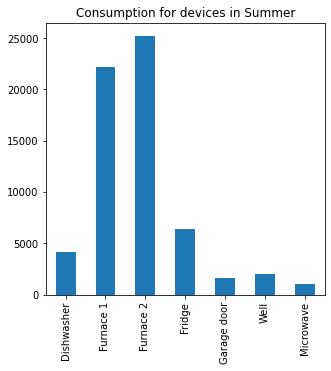

In [84]:

plot = all_devices_energy_consumption_summer.plot(kind = "bar", figsize = (5,5))
plot.set_title("Consumption for devices in Summer")



Text(0.5, 1.0, 'Consumption for devices in Winter')

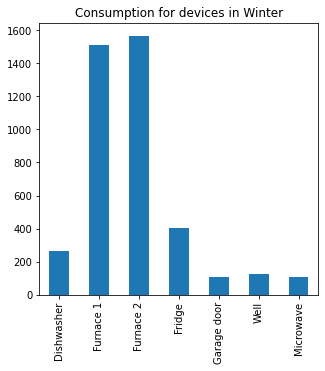

In [85]:
plot = all_devices_energy_consumption_winter.plot(kind = "bar", figsize = (5,5))
plot.set_title("Consumption for devices in Winter")

In [86]:
devices_energy_df.drop('summary', axis=1, inplace=True)
all_devices_energy_consumption=devices_energy_df.sum()
all_devices_energy_consumption

Dishwasher      4812.563171
Furnace 1      25651.722584
Furnace 2      28959.434850
Fridge          7390.891150
Garage door     1874.906900
Well            2344.724035
Microwave       1315.967918
dtype: float64

Text(0.5, 1.0, 'Consumption for devices in both summer and winter')

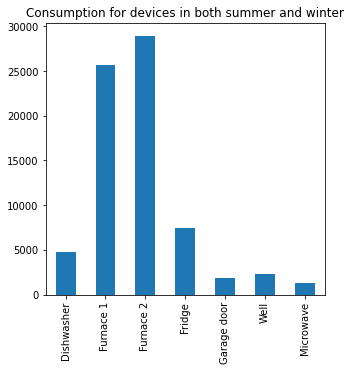

In [87]:


plot = all_devices_energy_consumption.plot(kind = "bar", figsize = (5,5))
plot.set_title("Consumption for devices in both summer and winter")

